# RESULTADOS

### Contexto
Ecobici es un sistema de bicicletas compartidas 
lanzado en febrero de 2010 por el gobierno de la 
Ciudad de México para la realización de viajes de 
corta distancia y duración a precios reducidos o de forma gratuita. 

### Datos

A través de la librería de Pandas vamos a leer 
los archivos .csv para posteriormente guardarlos 
en un formato de DataFrame.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 
import datetime


stations = pd.read_csv('stations.csv')
agosto = pd.read_csv('2019-08.csv')
septiembre = pd.read_csv('2019-09.csv')
octubre = pd.read_csv('2019-10.csv')

C:\Users\osiri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [382]:
def arribos_por_hora(fecha):
    
    frames = [agosto, septiembre, octubre]
    viajes = pd.concat(frames)
    dia = viajes[viajes['Fecha_Arribo'] == fecha]
    hours = []
    
    for i in dia['Hora_Arribo'].values:
        pt = datetime.datetime.strptime(i,'%H:%M:%S')
        hours.append(pt.hour)
        
    return hours

In [383]:
semana_agosto = ['05/08/2019',
                  '06/08/2019',
                  '07/08/2019',
                  '08/08/2019',
                  '09/08/2019',
                  '10/08/2019',
                  '11/08/2019']

semana_ = ['Lunes',
           'Martes',
           'Miercoles',
           'Jueves',
           'Viernes',
           'Sábado',
           'Domingo']

In [384]:
def trazar_resultados(semana):
    plt.figure(figsize = (10,15))
    for i in range(len(semana)):
        plt.subplot(len(semana),1,i+1)  
        arribo_hora =  pd.Series(arribos_por_hora(semana[i])).value_counts()
        arribo_hora.sort_index().plot(label='Arribos por hora')
        horas = list(pd.Series(arribo_hora.sort_index().index))
        pico = pd.Series(arribos_por_hora(semana[i])).value_counts().values[0]
        pico_lista = pico*np.ones(len(horas))
        hora_pico = list(pd.Series(arribos_por_hora(semana[i])).value_counts().index)[0]
        plt.plot(horas,pico_lista, ':b', label=str(pico)+ ' '+ 'arribos')
        plt.plot(hora_pico,pico, '*r', label='hora pico a las ' + str(hora_pico)+' '+'hrs.')
        plt.title(semana_[i] + ' ' + semana[i])
        plt.ylim(0,4000)
        plt.ylabel('Arribos por Hora')
        plt.legend()
        plt.grid()

    plt.xlabel('Horas')
    plt.subplots_adjust(hspace=0.5)
    plt.show()

### ¿Cómo se comporta el arribo de viajes por horas del día y por estaciones? 

#### ● ¿Cual es la hora ‘pico’ del servicio?

Realizando una exploración de datos de los arribos por una semana 
de cada mes, se aprecia que el comportamiento en agosto
a las horas pico perduran a las 18:00 hrs 
de lunes a jueves, los viernes a las 8:00 y los fines de semana sábado 
14:00 hrs y domingo 13:00.

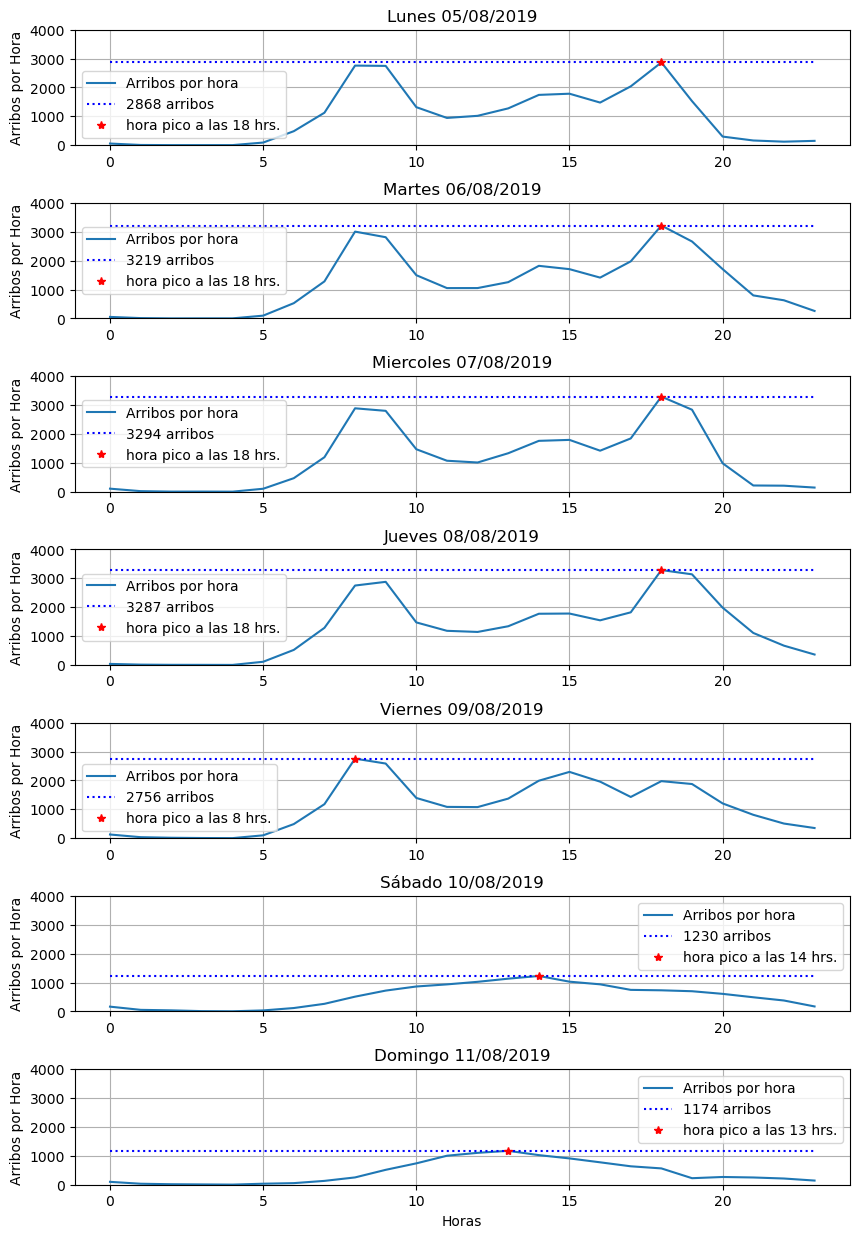

In [385]:
trazar_resultados(semana_agosto)

In [386]:
semana_septiembre = ['09/09/2019',
                     '10/09/2019',
                     '11/09/2019',
                     '12/09/2019',
                     '13/09/2019',
                     '14/09/2019',
                     '15/09/2019']

Para una semana de septiembre se encontró que la hora pico 
se mantuvo a las 8:00 hrs.

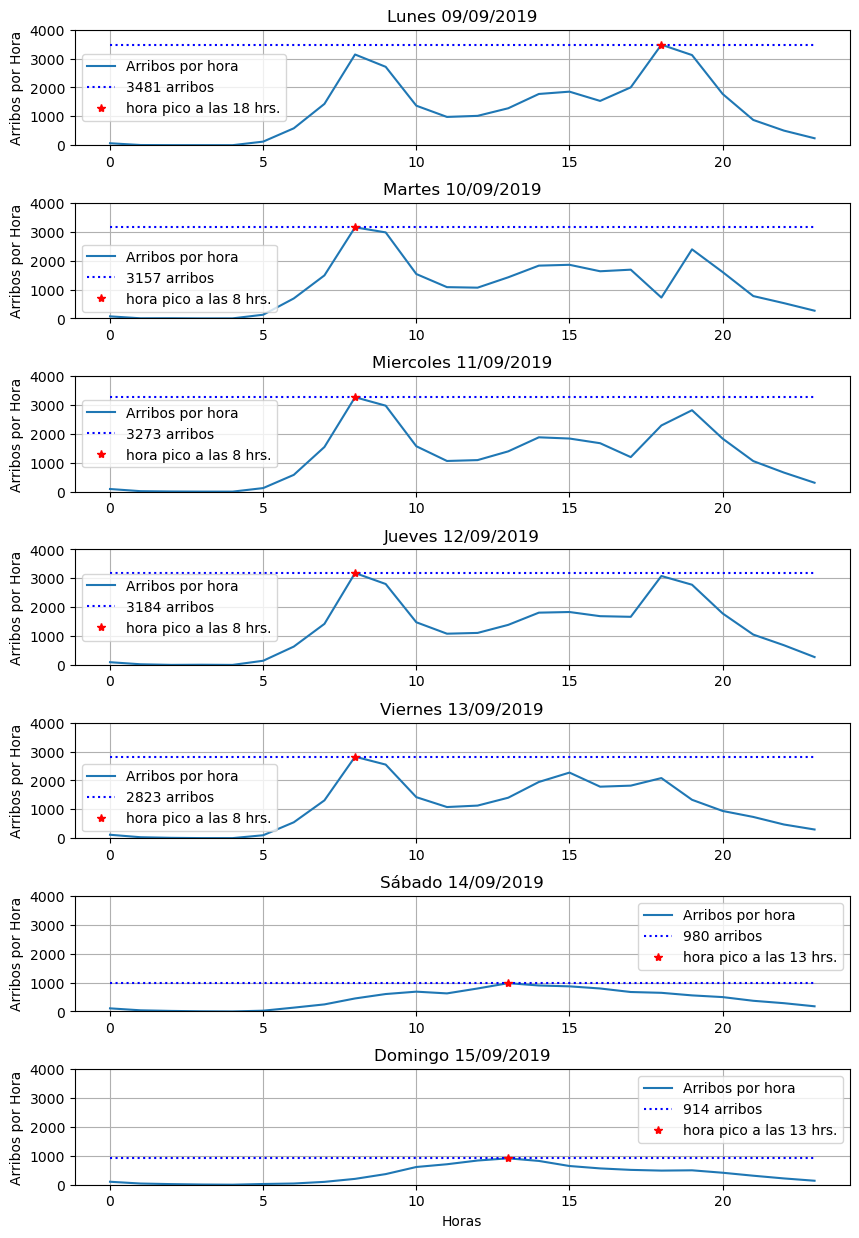

In [387]:
trazar_resultados(semana_septiembre)

In [388]:
semana_octubre = ['21/10/2019',
                  '22/10/2019',
                  '23/10/2019',
                  '24/10/2019',
                  '25/10/2019',
                  '26/10/2019',
                  '27/10/2019']

Al igual para una semana de octubre hubo una 
demanda mas temprana del servicio a las 8:00 hrs.

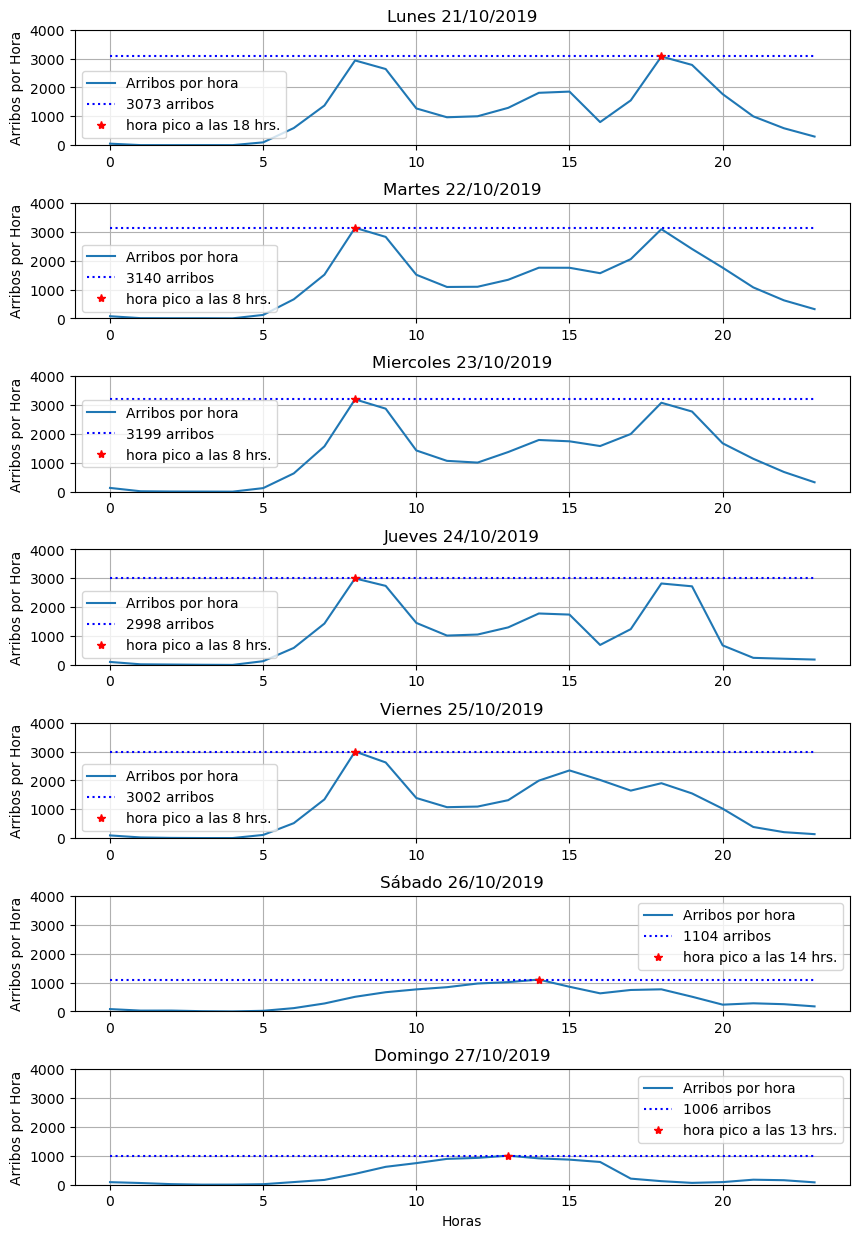

In [389]:
trazar_resultados(semana_octubre)

Partiendo de lo anterior se presentan a continuación las horas pico
por cada mes en el cual hubo una demanda en la cual inicialmente en 
agosto perduró a las 18:00 hrs y se mantuvo más temprano a las 8:00 hrs 
para los dos meses posteriores.

In [390]:
mes = ['Agosto', 'Septiembre', 'Octubre']
frames = [agosto, septiembre, octubre]

def horas_pico_por_mes(mes, frame):
    
    fechas = list(frame['Fecha_Arribo'].unique())
    hora_pico_lista = []
    
    for i in range(len(fechas)):
        hora_pico = list(pd.Series(arribos_por_hora(fechas[i])).value_counts().index)[0]
        hora_pico_lista.append(hora_pico)
        
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.barh(fechas,hora_pico_lista)
    label = hora_pico_lista
    for i in range(len(label)):
        plt.text(x=label[i] , y=fechas[i] ,s = label[i], size = 6)
    ax.set_yticks(fechas)
    ax.set_yticklabels(fechas)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Horas')
    ax.set_title('Horas "pico" en el mes de ' + " " + mes)
    plt.grid()
    plt.show()

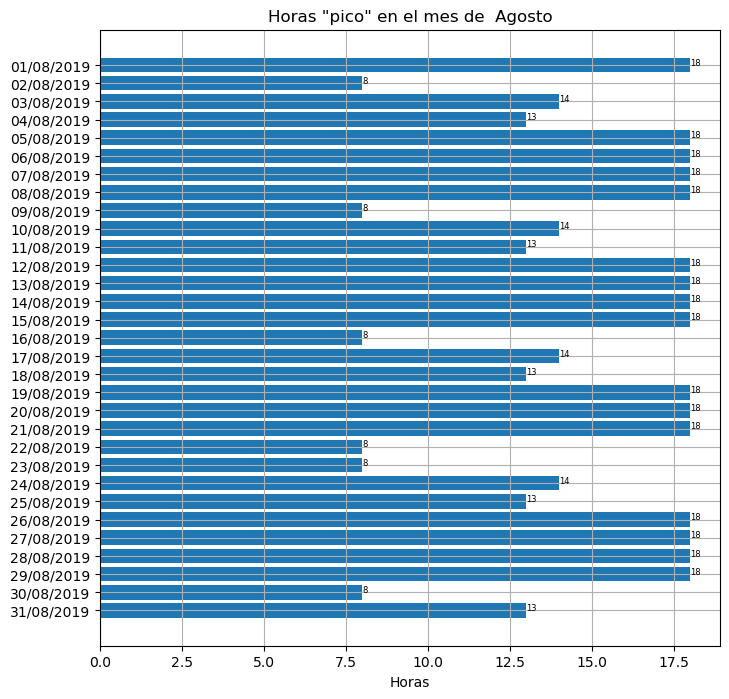

In [391]:
horas_pico_por_mes(mes[0],frames[0])

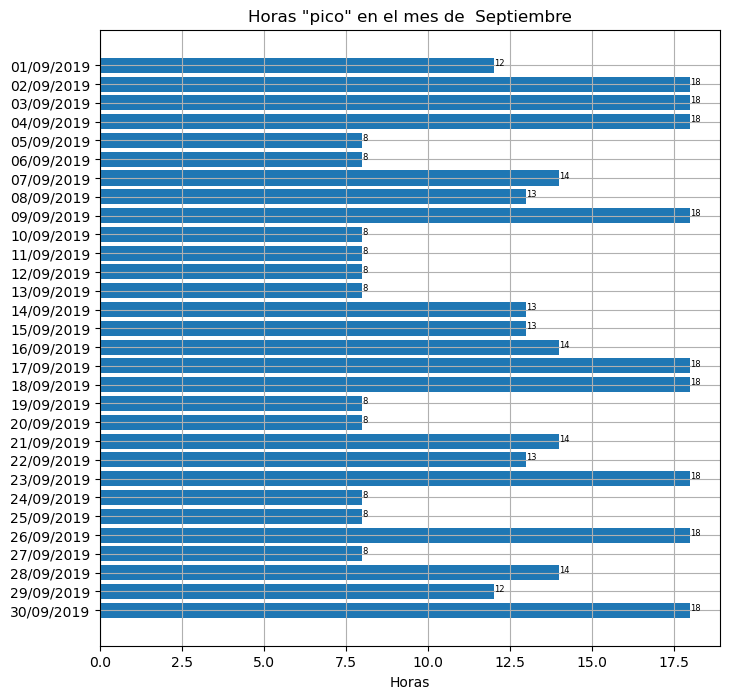

In [392]:
horas_pico_por_mes(mes[1],frames[1])

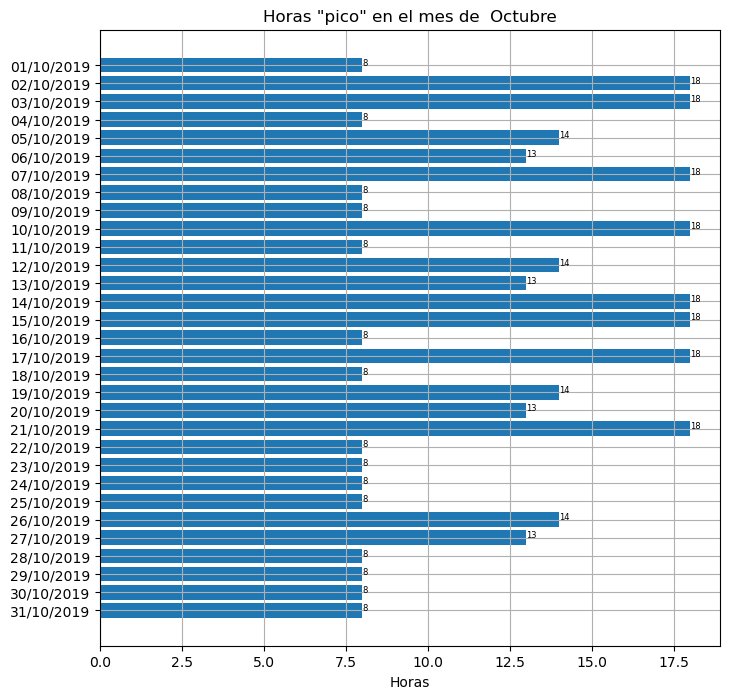

In [393]:
horas_pico_por_mes(mes[2],frames[2])

#### ● ¿Cuál es la estación con más viajes? ¿y la que tiene menos viajes?

In [394]:
frames = [agosto, septiembre, octubre]
viajes = pd.concat(frames)
arribos_estaciones = viajes['Ciclo_Estacion_Arribo'].value_counts()

In [395]:
arribos_estaciones

266     24957
27      19979
1       19356
271     15641
64      15402
        ...  
113        28
3000       22
1001       13
3002        7
3001        4
Name: Ciclo_Estacion_Arribo, Length: 483, dtype: int64

La estación con mayor número de arribos es la 266 con 24957

In [396]:
print(arribos_estaciones.values[0])
print(arribos_estaciones.index[0])

24957
266


La estación con menor número de arribos es la 3001 con 4

In [397]:
print(arribos_estaciones.values[len(arribos_estaciones)-1])
print(arribos_estaciones.index[len(arribos_estaciones)-1])

4
3001


### ● Tendencia de estaciones. Considerando los viajes de los tres meses ¿qué estaciones han incrementado más su demanda (un top 3 es suficiente) y cuales han descendido en demanda (top 3)?

La metodología empleada para pronosticar el aumento o descenso de la demanda 
fue a través de la de la regresión lineal, el cual nos permite a través de la pendiente
de la linea para estimar el aumento o descenso de manera porcentual.

In [7]:
estaciones = np.sort(viajes['Ciclo_Estacion_Retiro'].unique())

In [400]:
from sklearn import linear_model

def medir_demanda(n):
    retiros_por_estacion = viajes[viajes['Ciclo_Estacion_Retiro'] == n]
    fechas_3_meses = retiros_por_estacion['Fecha_Retiro'].unique()
    dict_retiros = retiros_por_estacion['Fecha_Retiro'].value_counts().to_dict()
    retiros = [] 
    for i in range(len(fechas_3_meses)):
        retiros.append(dict_retiros[fechas_3_meses[i]])
    serie = pd.Series(retiros, index=fechas_3_meses)
    x = np.array(pd.Series(retiros).index)
    x = x.reshape(-1,1)
    y = np.array(pd.Series(retiros).values)
    y = y.reshape(-1,1)
    
    reg = linear_model.LinearRegression()
    reg.fit(x,y)
    a = reg.coef_
    b = reg.intercept_
    yp = a*x+b
    return serie, x, y, a, b, yp

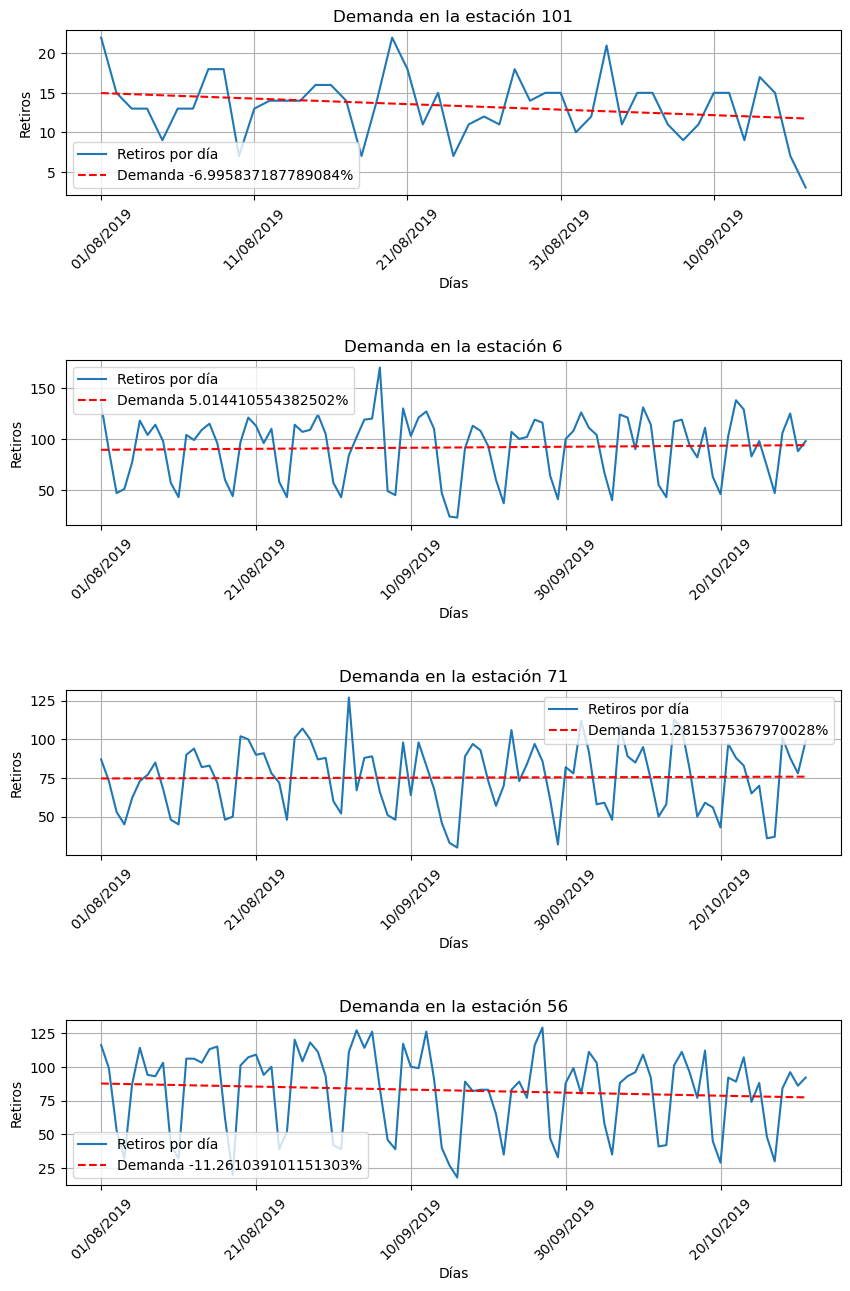

In [401]:
plt.figure(figsize = (10,15))
serie, x, y, a, b, yp = medir_demanda(estaciones[100])
plt.subplot(4,1,1)
serie.plot(label='Retiros por día')
plt.plot(x,yp, '--r', label='Demanda ' + str(a[0][0]*100) + '%')   
plt.title('Demanda en la estación '+ str(estaciones[100]))
plt.xlabel('Días')
plt.ylabel('Retiros')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

serie, x, y, a, b, yp = medir_demanda(estaciones[5])
plt.subplot(4,1,2)
serie.plot(label='Retiros por día')
plt.plot(x,yp, '--r', label='Demanda ' + str(a[0][0]*100) + '%')   
plt.title('Demanda en la estación '+ str(estaciones[5]))
plt.xlabel('Días')
plt.ylabel('Retiros')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

serie, x, y, a, b, yp = medir_demanda(estaciones[70])
plt.subplot(4,1,3)
serie.plot(label='Retiros por día')
plt.plot(x,yp, '--r', label='Demanda ' + str(a[0][0]*100) + '%')   
plt.title('Demanda en la estación '+ str(estaciones[70]))
plt.xlabel('Días')
plt.ylabel('Retiros')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

serie, x, y, a, b, yp = medir_demanda(estaciones[55])
plt.subplot(4,1,4)
serie.plot(label='Retiros por día')
plt.plot(x,yp, '--r', label='Demanda ' + str(a[0][0]*100) + '%')   
plt.title('Demanda en la estación '+ str(estaciones[55]))
plt.xlabel('Días')
plt.ylabel('Retiros')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=1)
plt.legend()
plt.show()

In [402]:
demanda = []
for i in range(len(estaciones)):
    serie, x, y, a, b, yp = medir_demanda(estaciones[i])
    demanda.append(a[0][0])

In [412]:
demanda_por_st = pd.Series(demanda, index=estaciones).sort_values(ascending=False)

Las estaciones con mayor demanda en el servicio fueron la 1001, 29 y 16 (de mayor a menor).

In [404]:
demanda_por_st[:3]

1001    1.500000
29      0.347316
16      0.303695
dtype: float64

Las estaciones con menor demanda en el servicio fueron la 41, 271 y 66 (de menor a mayor).

In [405]:
demanda_por_st[len(demanda_por_st)-3:len(demanda_por_st)]

66    -0.282069
271   -0.337954
41    -0.429431
dtype: float64

## ● ¿Qué relación existe entre los retiros y arribos entre estaciones?

Para poder medir relacion entre los retiros y arribos se utilizó una
matriz de correlacion lineal.

Se separa los arribos

In [406]:
frames = [agosto, septiembre, octubre]
viajes = pd.concat(frames)
arribos_estaciones = viajes['Ciclo_Estacion_Arribo'].value_counts()
arribos_estaciones = arribos_estaciones.sort_index()
arribos_estaciones

1       19356
2        6350
3        6212
4        6509
5        6899
        ...  
1001       13
1002      187
3000       22
3001        4
3002        7
Name: Ciclo_Estacion_Arribo, Length: 483, dtype: int64

Se separa los retiros

In [407]:
retiros_estaciones = viajes['Ciclo_Estacion_Retiro'].value_counts()
retiros_estaciones = retiros_estaciones.sort_index()
retiros_estaciones

1       18478
2        6503
3        6851
4        5742
5        6501
        ...  
1001       13
1002        1
3000        6
3001        2
3002        3
Name: Ciclo_Estacion_Retiro, Length: 483, dtype: int64

Con ambas series contruidas se crean dos atributos

In [408]:
servicio = pd.DataFrame({'Retiros' : retiros_estaciones, 
                        'Arribos' : arribos_estaciones})
servicio

,Retiros,Arribos
1,18478,19356
2,6503,6350
3,6851,6212
4,5742,6509
5,6501,6899
...,...,...
1001,13,13
1002,1,187
3000,6,22
3001,2,4


Con ambos atributos se crear la matriz de correlación

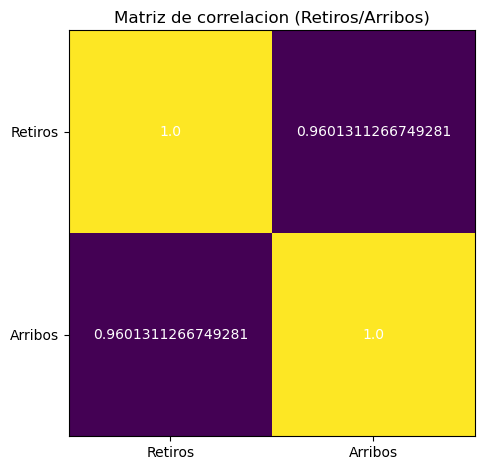

In [409]:
corrMatt = servicio[["Retiros","Arribos"]].corr()
mask = np.array(corrMatt)

fig, ax = plt.subplots()
im = ax.imshow(mask)
mov = ["Retiros","Arribos"]
ax.set_xticks(np.arange(len(mov)))
ax.set_yticks(np.arange(len(mov)))
ax.set_xticklabels(mov)
ax.set_yticklabels(mov)

for i in range(len(mov)):
    for j in range(len(mov)):
        text = ax.text(j, i, mask[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de correlacion (Retiros/Arribos)")
fig.tight_layout()

plt.show()

Entonces existe una alta correlación con un valor del 96%.